In [2]:
!pip install -r /content/clipscore/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-42pnbkpi
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-42pnbkpi
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/jmhessel/pycocoevalcap.git to /tmp/pip-req-build-mvmud7dv
  Running command git clone --filter=blob:none --quiet https://github.com/jmhessel/pycocoevalcap.git /tmp/pip-req-build-mvmud7dv
  Resolved https://github.com/jmhessel/pycocoevalcap.git to commit 96b9f5c0e1b97642a945b3d15f5b6db5e5e138d2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.3 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369398 sha256=0a349a9468dbcf8a047f0042a7bb4d40c72dd9eb1e7

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import clipscore
import clip
import torch
import warnings

In [4]:

def filter_data(input_json, image_directory):
    # unpacking JSON file
    data = {}
    with open(input_json) as f:
        data.update(json.load(f))
    print('Loaded {} images'.format(len(data)))

    images = []
    refs = []
    candidates = []
    human_scores = []
    for k, v in list(data.items()):
        for human_judgement in v['human_judgement']:
            if np.isnan(human_judgement['rating']):
                print('NaN')
                continue
            images.append(image_directory + '/' + k + '.jpg')
            refs.append([' '.join(gt.split()) for gt in v['ground_truth']])
            candidates.append(' '.join(human_judgement['caption'].split()))
            human_scores.append(human_judgement['rating'])
    print(images)
    # enable GPU    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    if device == 'cpu':
        warnings.warn(
            'CLIP runs in full float32 on CPU. Results in paper were computed on GPU, which uses float16. '
            'If you\'re reporting results on CPU, please note this when you report.')
    model, transform = clip.load("ViT-B/32", device=device, jit=False)
    model.eval()
    
    # running clip score
    image_feats = clipscore.extract_all_images(
        images, model, device, batch_size=64, num_workers=8)
    candidate_feats = clipscore.extract_all_captions(candidates, model, device)
    
    # plotting pie chart + percentage of likert score distribution
    likert_score_counts = np.zeros(len(set(human_scores)))
    print(human_scores)

    return image_feats, candidate_feats, human_scores
        

In [5]:
%cd clipscore

/content/clipscore


In [6]:
import clipscore
from importlib import reload
reload(clipscore)

<module 'clipscore' from '/content/clipscore/clipscore.py'>

In [7]:
image_embed, candidate_embed, likert_scores = filter_data('flickr8k_example/flickr8k/flickr8k.json', 'Images_flicker')

Loaded 1000 images
['Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flicker/1056338697_4f7d7ce270.jpg', 'Images_flic

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 130MiB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 67/67 [00:12<00:00,  5.47it/s]

[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 4.0, 4.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 1.0, 1.0,

In [8]:
input_data = [np.append(i, j) for i, j in zip(image_embed, candidate_embed)]

In [27]:
likert_scores = list(map(int, likert_scores))

In [29]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(input_data, to_categorical(likert_scores), test_size=0.2, random_state=42)

In [ ]:
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(2048, 1024, 512, 256, 128), (1024, 512, 256, 128, 64), (32,), (16,), (32, 16), 
                           (128, 64, 32, 16), (256, 128, 64, 32, 16), (512, 128, 64), (512, 256, 128, 32)]
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1)
# clf = MLPClassifier(hidden_layer_sizes=(128,), solver='adam')
clf.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(2048, 1024, 512, 256, 128),
                                                (1024, 512, 256, 128, 64),
                                                (32,), (16,), (32, 16),
                                                (128, 64, 32, 16),
                                                (256, 128, 64, 32, 16),
                                                (512, 128, 64),
                                                (512, 256, 128, 32)]})

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([1058.67837501,  484.94233351,   24.46257825,   17.87354245,
         26.1421742 ,   78.33128738,  135.98382421,  224.49643955,
        176.46432753]), 'std_fit_time': array([129.3886492 ,  72.53661933,   0.62952716,   0.33305071,
         1.0709703 ,   2.68014565,  12.75388358,  34.76325915,
        24.20482072]), 'mean_score_time': array([0.5098773 , 0.50921273, 0.06454697, 0.05638494, 0.0652801 ,
       0.10156407, 0.14160643, 0.20902019, 0.11115985]), 'std_score_time': array([0.00877282, 0.02289271, 0.00300016, 0.00177519, 0.00460492,
       0.01259193, 0.00793471, 0.00214166, 0.00452953]), 'param_hidden_layer_sizes': masked_array(data=[(2048, 1024, 512, 256, 128), (1024, 512, 256, 128, 64),
                   (32,), (16,), (32, 16), (128, 64, 32, 16),
                   (256, 128, 64, 32, 16), (512, 128, 64),
                   (512, 256, 128, 32)],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prediction = clf.predict(X_test)

print('accuracy', accuracy_score(y_test, prediction))
print('best params', clf.best_params_)
print('best score', clf.best_score_)

accuracy 0.7290379523389232
best params {'hidden_layer_sizes': (1024, 512, 256, 128, 64)}
best score 0.7071295364887915


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction))

[[1648  318    6    3]
 [ 310  616   57    3]
 [  10  122  165   30]
 [   0    3   35   73]]


In [ ]:
# # Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'hidden_layer_sizes': (1024, 256, 128, 64)}
0.702 (+/-0.012) for {'hidden_layer_sizes': (1024,)}
0.702 (+/-0.017) for {'hidden_layer_sizes': (2048,)}
0.704 (+/-0.016) for {'hidden_layer_sizes': (64, 32)}
0.697 (+/-0.012) for {'hidden_layer_sizes': (64, 32, 16)}
0.703 (+/-0.014) for {'hidden_layer_sizes': (128, 64, 32)}
0.704 (+/-0.024) for {'hidden_layer_sizes': (1024, 256, 64)}
0.707 (+/-0.014) for {'hidden_layer_sizes': (1024, 256, 128, 64)}
0.703 (+/-0.017) for {'hidden_layer_sizes': (2048,)}
0.698 (+/-0.016) for {'hidden_layer_sizes': (2048, 512)}


In [ ]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", clf.best_estimator_)
print("\n The best score across ALL searched params:\n", clf.best_score_)
print("\n The best parameters across ALL searched params:\n", clf.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 MLPClassifier(hidden_layer_sizes=(1024, 256, 128, 64), max_iter=100)

 The best score across ALL searched params:
 0.7074240329342395

 The best parameters across ALL searched params:
 {'hidden_layer_sizes': (1024, 256, 128, 64)}


Text(0.5, 427.9555555555555, 'Predicted')

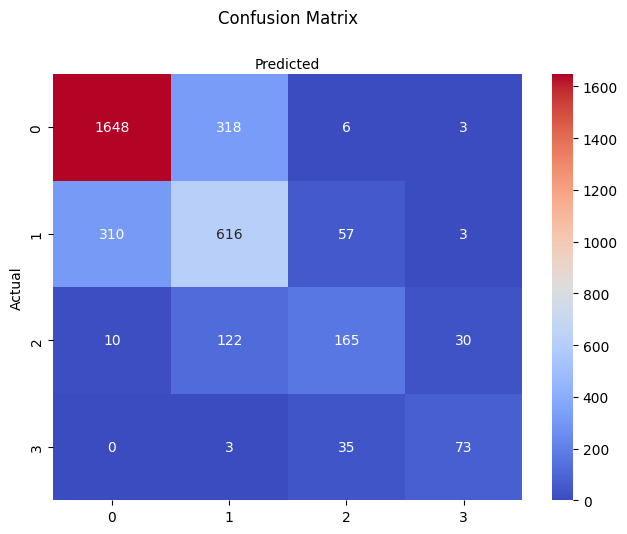

In [ ]:
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_test, prediction)

class_names = [1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')